In [ ]:
from google import genai
from IPython.display import Image as IPImage
from IPython.display import display
from PIL import Image

from ai_storytime.utils import get_gemini_api_key

try:
    GEMINI_API_KEY = get_gemini_api_key()
    print("GEMINI_API_KEY loaded successfully.")
except ValueError as e:
    raise RuntimeError("GEMINI_API_KEY not found.") from e

client = genai.Client(api_key=GEMINI_API_KEY)
model_id = "gemini-2.0-flash"

GEMINI_API_KEY loaded successfully.


# Gemini Docs

* https://github.com/googleapis/python-genai
* https://ai.google.dev/gemini-api/docs/text-generation

# Text input

In [3]:
res = client.models.generate_content(
    model=model_id,
    contents=["告訴我一個關於臺灣的無聊事實。"],
)
print(res.text)

臺灣的垃圾車播放著兩首特定的音樂：一首是貝多芬的《給愛麗絲》，另一首是波蘭作曲家泰克拉·巴拉諾夫斯卡的《少女的祈禱》。這是一個提醒居民出來丟垃圾的信號。



# Image input

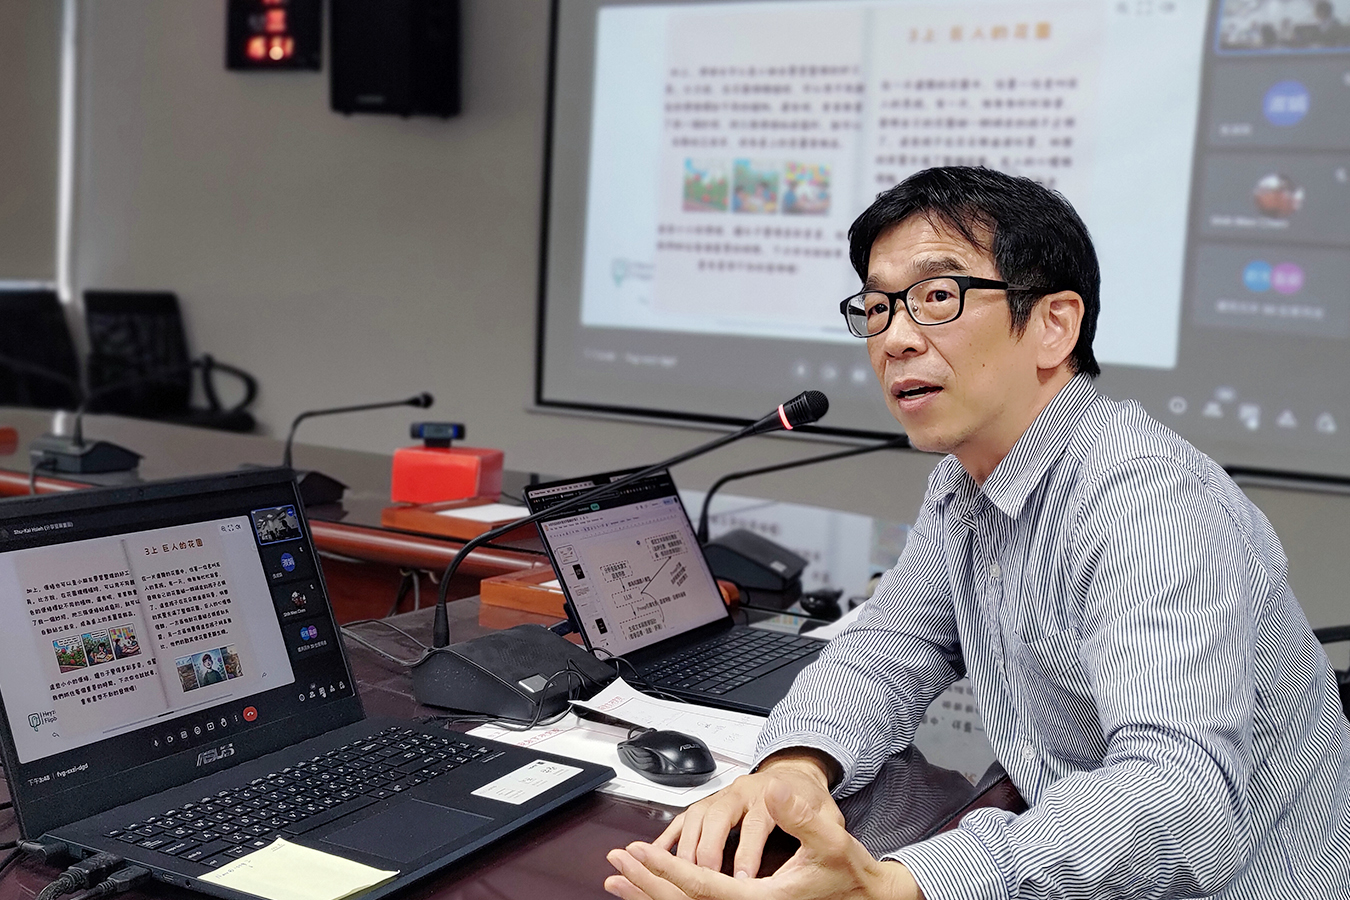

In [13]:
img_path = "../data/img/shuuukai.jpg"
display(IPImage(img_path, width=600))

In [15]:
image = Image.open(img_path)
res = client.models.generate_content(
    model=model_id,
    contents=[image, "跟我介紹這張圖片的內容。"],
)
print(res.text)

當然，這是一張在會議室場景中的照片。一位戴眼鏡的中年男子坐在桌前，桌上有兩台筆記本電腦，還有麥克風和其他設備。

男子穿著一件條紋襯衫，面朝鏡頭，好像正在發言或演示。在他身後的牆上，掛著一個投影屏幕，上面顯示著幻燈片。整個場景看起來像是一個線上講座或會議。
